# Scratch Notebook

Basically just a scratch notebook for smaller analyses

## PRESS WEIGHTS

20240802: We want the weights to the press model to include into the patent application.

In [ ]:
# setup preamble
import pandas as pd
import numpy as np
from joblib import load

press = load("../models/jobs/press451_with_scaler.joblib")
model = press["voting"]
genes = press.feature_names_in_

In [40]:
# create a dataframe of all the genes
model = press["voting"]
weights = pd.DataFrame(index=genes)
for tree in model.named_estimators_.keys():
    m = model.named_estimators_[tree]
    ft = m.feature_importances_
    weights[tree] = ft

# get the average weight of each gene
weight_stats = weights.T.describe().T

/var/folders/05/f45rjpnn49g5gt5qgn93bhcc0000gn/T/ipykernel_48116/1592872445.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weights[tree] = ft
/var/folders/05/f45rjpnn49g5gt5qgn93bhcc0000gn/T/ipykernel_48116/1592872445.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weights[tree] = ft
/var/folders/05/f45rjpnn49g5gt5qgn93bhcc0000gn/T/ipykernel_48116/1592872445.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

In [ ]:
# make a heatmap of the press_weights with sns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(weights, cmap="coolwarm", center=0)
plt.title("PRESS weights")
plt.show()

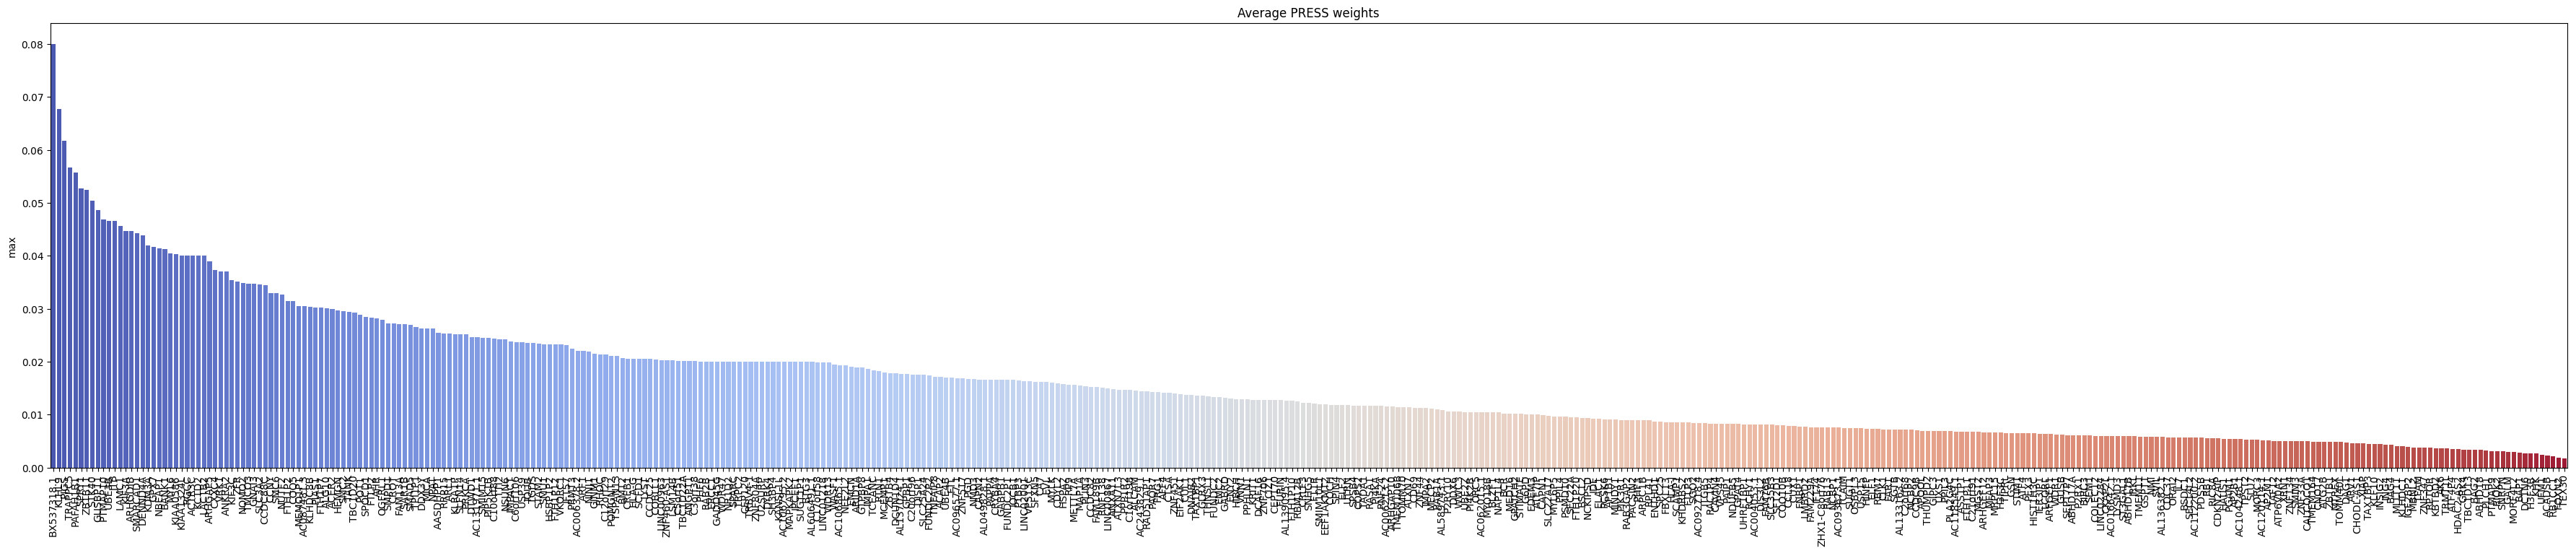

In [54]:
# make a barplot of the average weights
weight_stats = weight_stats.sort_values(by = "max", ascending=False)
plt.figure(figsize=(45, 8))
sns.barplot(x=weight_stats.index, y=weight_stats["max"], palette="coolwarm")
plt.title("Average PRESS weights")
plt.xticks(rotation=90)
plt.show()